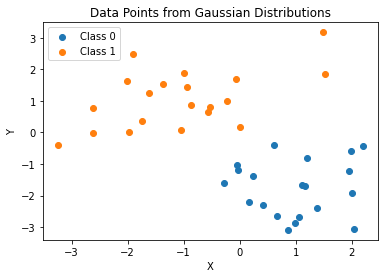

In [1609]:
#1
import numpy as np
import matplotlib.pyplot as plt
import math 


TotalNormal1=np.random.multivariate_normal(np.array([1,-1]),np.eye(2),60)
TotalNormal2=np.random.multivariate_normal(np.array([-1,1]),np.eye(2),60)



Gauss1=TotalNormal1[:20]
Gauss2=TotalNormal2[:20]

GaussVal1=TotalNormal1[20:40]
GaussVal2=TotalNormal2[20:40]

GaussTest1=TotalNormal1[40:]
GaussTest2=TotalNormal2[40:]


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

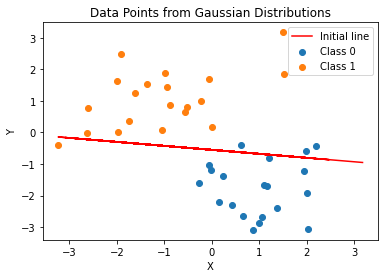

In [1610]:
#2a
import copy
theta=np.random.uniform(-0.5,0.5,[3,1])
thetaCopy= copy.deepcopy(theta)

x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

In [1611]:
#2b
def Logistic(val):
    return 1/(1+np.exp(-val))

def h0_x(theta,Gauss):# only done for class 0
    h0=np.array([])

    for i in range(len(Gauss)):
        z= theta[0]+theta[1]*Gauss[i][0]+ theta[2]*Gauss[i][1]
        h0=np.append(h0,Logistic(z))

    return h0

import math

def likelihood(h01, h02):
    likelihood_1 = np.log(h01).sum()
    likelihood_2 = np.log(1 - h02).sum()
    return -(likelihood_1 + likelihood_2)

    

print("The error is: ")
print(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2)))

#confusion matrix , if probababilty<0.5 class 0 else class1


def confusion(Gauss,classNum,params):
    confusion = np.zeros((2,2))# rows= predicted 0 1, cols=actual 0 1
    for i in range(len(Gauss)):
        z= params[0]+params[1]*Gauss[i][0]+ params[2]*Gauss[i][1]

        if Logistic(z)<0.5:#predicted class 0
            if classNum==0:
                confusion[0][0]+=1
            else:
                confusion[0][1]+=1
        else:#preicted class is 1
            if classNum==0:
                confusion[1][0]+=1
            else:
                confusion[1][1]+=1
        
    return confusion


conf1=confusion(GaussTest1,0,theta)
conf2=confusion(GaussTest2,1,theta)

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")




The error is: 
18.217571720036453
confusion matrix
[[12. 17.]
 [ 8.  3.]]
accuracy is 37.5%


In [1612]:
#2d Gradient decent 1 itteration

# theta=np.random.uniform(-0.5,0.5,[3,1])

Old_theta=theta
print("old: "+str(Old_theta))
alpha=0.01
count=0

#class 0
theta[0]=theta[0]-alpha* (h0_x(theta,GaussTest1)[0]-0)
theta[1]=theta[1]-alpha* (h0_x(theta,GaussTest1)[0]*GaussTest1[0][0])
theta[2]=theta[2]-alpha* (h0_x(theta,GaussTest1)[0]*GaussTest1[0][1])



#class1
theta[0]=theta[0]-alpha* (h0_x(theta,GaussTest2)[0]-1)
theta[1]=theta[1]-alpha* ((h0_x(theta,GaussTest2)[0]-1)*GaussTest2[0][0])
theta[2]=theta[2]-alpha* ((h0_x(theta,GaussTest2)[0]-1)*GaussTest2[0][1])




print("new: "+ str(theta))


old: [[-0.2632208 ]
 [-0.06024484]
 [-0.47768892]]
new: [[-0.25957309]
 [-0.07931369]
 [-0.45772996]]


old parameter: [[-0.25957309]
 [-0.07931369]
 [-0.45772996]]
error: 18.881440866849566

new parameter: [[-0.24676947]
 [-0.28380089]
 [-0.12859315]]
error: 30.71751858592887


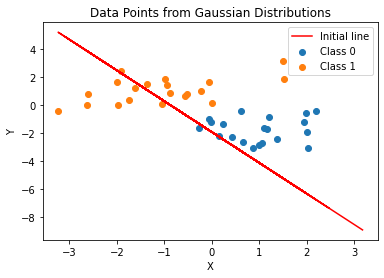

In [1613]:
#2e Gradient decent 1 for loop



# theta=np.random.uniform(-0.5,0.5,[3,1])


Old_theta=theta

print("old parameter: "+str(Old_theta))
print("error: "+str(likelihood(h0_x(Old_theta,Gauss1),h0_x(Old_theta,Gauss2))))
print()


alpha=0.01
count=0
for i in range(len(Gauss1)):

#class 0
    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss1)[i]-0)
    theta[1]=theta[1]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][0])
    theta[2]=theta[2]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][1])


    #class1
    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss2)[i]-1)
    theta[1]=theta[1]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][0])
    theta[2]=theta[2]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][1])
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))


x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

# conf1=confusion(Gauss1,0)
# conf2=confusion(Gauss2,1)

# finalconf=np.ones((2,2))
# finalconf[:,0]=conf1[:,0]
# finalconf[:,1]=conf2[:,1]

# print("confusion matrix")

# print(finalconf)

# accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

# print("accuracy is "+ str(accuracy)+"%")



old parameter: [[-0.2632208 ]
 [-0.06024484]
 [-0.47768892]]
error: 18.217571720036453

new parameter: [[-1.51812819]
 [-0.32247094]
 [ 2.04576521]]
error: 139.90194651150378


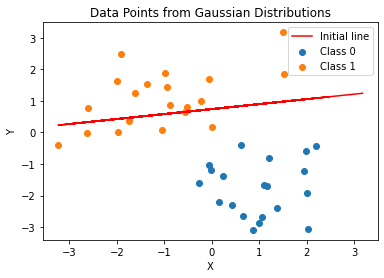

In [1614]:
#2f
import copy


# theta=np.random.uniform(-0.5,0.5,[3,1])

theta=thetaCopy
Old_theta=theta
print("old parameter: "+str(Old_theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()




alpha=0.01
count=0
e=0.05

temp=np.array(theta)

while np.linalg.norm(theta-temp)<e and count<1000:

#class 0
    temp= copy.deepcopy(theta)



    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss1)[i]-0)
    theta[1]=theta[1]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][0])
    theta[2]=theta[2]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][1])


    #class1
    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss2)[i]-1)
    theta[1]=theta[1]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][0])
    theta[2]=theta[2]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][1])
    count+=1
   

   
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()

# conf1=confusion(Gauss1,0)
# conf2=confusion(Gauss2,1)

# finalconf=np.ones((2,2))
# finalconf[:,0]=conf1[:,0]
# finalconf[:,1]=conf2[:,1]

# print("confusion matrix")

# print(finalconf)

# accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

# print("accuracy is "+ str(accuracy)+"%")

In [1615]:
#2g testing validation data

print("training:")
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()

conf1=confusion(GaussVal1,0,theta)
conf2=confusion(GaussVal2,1,theta)

print("validation: ")
print("error: "+str(likelihood(h0_x(theta,GaussVal1),h0_x(theta,GaussVal2))))
print()

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")


training:
error: 139.90194651150378

validation: 
error: 127.39380760848618

confusion matrix
[[20.  3.]
 [ 0. 17.]]
accuracy is 92.5%


old parameter: [[-1.51812819]
 [-0.32247094]
 [ 2.04576521]]
error: 139.90194651150378

new parameter: [[-1.51812882]
 [-0.32247123]
 [ 2.04576585]]
error: 139.9019937460965


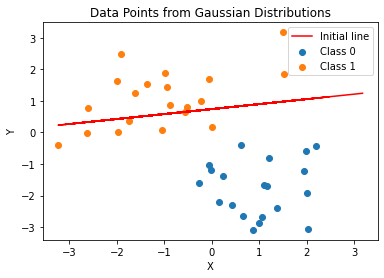

training:
error: 139.9019937460965

validation: 
error: 127.39384929223073

confusion matrix
[[20.  3.]
 [ 0. 17.]]
accuracy is 92.5%


In [1616]:
#2h change of hyper params

#2f
import copy


theta=np.random.uniform(-0.5,0.5,[3,1])

theta=thetaCopy
Old_theta=theta
print("old parameter: "+str(Old_theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()




alpha=0.00001
count=0
e=0.0000005

temp=np.array(theta)

while np.linalg.norm(theta-temp)<e and count<1000:

#class 0
    temp= copy.deepcopy(theta)



    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss1)[i]-0)
    theta[1]=theta[1]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][0])
    theta[2]=theta[2]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][1])


    #class1
    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss2)[i]-1)
    theta[1]=theta[1]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][0])
    theta[2]=theta[2]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][1])
    count+=1
   

   
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()


print("training:")
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()

conf1=confusion(GaussVal1,0,theta)
conf2=confusion(GaussVal2,1,theta)

print("validation: ")
print("error: "+str(likelihood(h0_x(theta,GaussVal1),h0_x(theta,GaussVal2))))
print()

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")









old parameter: [[-1.51812882]
 [-0.32247123]
 [ 2.04576585]]
error: 139.9019937460965

new parameter: [[-1.52438186]
 [-0.32527993]
 [ 2.05216242]]
error: 140.37198995684852


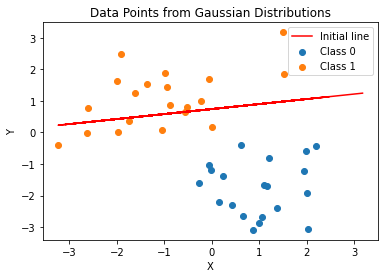

training:
error: 140.37198995684852

testing: 
error: 106.16508341749606

confusion matrix
[[20.  3.]
 [ 0. 17.]]
accuracy is 92.5%


In [1617]:
#2i
#2h change of hyper params

#2f
import copy


theta=np.random.uniform(-0.5,0.5,[3,1])

theta=thetaCopy
Old_theta=theta
print("old parameter: "+str(Old_theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()




alpha=0.1
count=0
e=0.0005

temp=np.array(theta)

while np.linalg.norm(theta-temp)<e and count<1000:

#class 0
    temp= copy.deepcopy(theta)



    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss1)[i]-0)
    theta[1]=theta[1]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][0])
    theta[2]=theta[2]-alpha* (h0_x(theta,Gauss1)[i]*Gauss1[i][1])


    #class1
    theta[0]=theta[0]-alpha* (h0_x(theta,Gauss2)[i]-1)
    theta[1]=theta[1]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][0])
    theta[2]=theta[2]-alpha* ((h0_x(theta,Gauss2)[i]-1)*Gauss2[i][1])
    count+=1
   

   
print("new parameter: "+ str(theta))
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
x1_range = np.append(Gauss1,Gauss2)

x2_range = -(theta[0] + theta[1]*x1_range) / theta[2] # solving in terms of x2 





plt.plot(x1_range, x2_range, label='Initial line', color='red')


plt.scatter(Gauss1[:, 0], Gauss1[:, 1], label='Class 0')
plt.scatter(Gauss2[:, 0], Gauss2[:, 1], label='Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points from Gaussian Distributions')
plt.legend()
plt.show()


print("training:")
print("error: "+str(likelihood(h0_x(theta,Gauss1),h0_x(theta,Gauss2))))
print()

conf1=confusion(GaussVal1,0,theta)
conf2=confusion(GaussVal2,1,theta)

print("testing: ")
print("error: "+str(likelihood(h0_x(theta,GaussTest1),h0_x(theta,GaussTest2))))
print()

finalconf=np.ones((2,2))
finalconf[:,0]=conf1[:,0]
finalconf[:,1]=conf2[:,1]

print("confusion matrix")

print(finalconf)

accuracy=(finalconf[0][0]+finalconf[1][1])/40 *100

print("accuracy is "+ str(accuracy)+"%")








